In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import os 
import math

In [2]:
def get_swaps_bounds(graphspace):
    edges = []
    mean_swaps = []
    names = []

    path = "../../Output/NetworksDetectedAtConvergence/" + graphspace
    files = os.listdir(path)
    
    for f in files:
        if f != ".ipynb_checkpoints":
            pickleFile = path + "/" +f
            pickle_in = open(pickleFile,"rb")
            savedList = pickle.load(pickle_in)
            
            allswaps = savedList[3] # An array of 200 elements.
                        
            edges.append(savedList[1])
            mean_swaps.append(np.mean(allswaps))
            names.append(f[:-4])
    
    return edges, mean_swaps, names

In [3]:
def plot_swaps(graphspace, edges, swaps, names, slope):
    plt.figure(figsize=(4, 4))
            
    edges = np.array(edges)
    swaps = np.array(swaps)
    
    satisfied_edges = []
    satisfied_swaps = []
    notsatisfied_edges = []
    notsatisfied_swaps = []
    
    filtered_csv = pd.read_csv("../../Output/EstimatedSamplingGaps/Filtered_" + graphspace + "_SamplingGaps.csv")
    
    filtered_names = list(filtered_csv['Network']) # These are name of the networks that satisfy criterion.
        
    for i in range(len(names)):
        if names[i] in filtered_names:
            satisfied_edges.append(edges[i])
            satisfied_swaps.append(swaps[i])
        else:
            notsatisfied_edges.append(edges[i])
            notsatisfied_swaps.append(swaps[i])

    if graphspace == "LoopyOnlyStub" or graphspace == "LoopyOnlyVertex":
        x_lim = 76000
    else:
        x_lim = 50000
        
    Y = [slope*xi for xi in range(-500, x_lim)]

    label_text = str(slope)+"m"

    plt.plot(range(-500, x_lim), Y, ls = "--", c = "r", label = label_text, linewidth=3)

    plt.scatter(satisfied_edges, satisfied_swaps, s = 100, alpha = 0.5, c = "c", marker = "o", label = "Satisfies criterion")
    plt.scatter(notsatisfied_edges, notsatisfied_swaps, s = 100, alpha = 0.5, c = "blue", marker = "^", label = "Does not satisfy criterion")

    plt.xscale("log")
    plt.yscale("log")
    plt.ylim(105, 99000000)
    plt.xlim(12, 60000)
    if graphspace == "LoopyOnlyStub" or graphspace == "LoopyOnlyVertex":
        plt.xlim(12, 90000)

    plt.xlabel("Number of edges, m", fontsize = 15, color = "black")
    plt.ylabel('Avg. swaps to convergence, ' + r'$\bar{s}$', fontsize = 15, color = "black")
    plt.yticks(fontsize = 15, color = "black")   
    plt.xticks(fontsize = 15, color = "black") 
    plt.legend(fontsize = 10, loc = "upper left")
    plt.show()

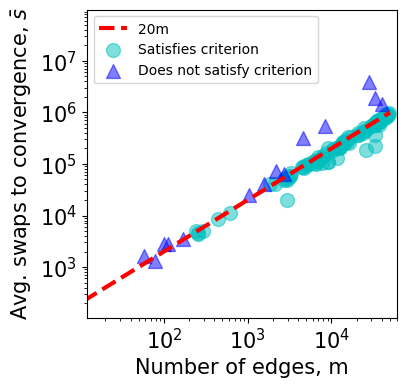

In [4]:
graphspace = "SimpleStub"
edges, mean_swaps, network_names = get_swaps_bounds(graphspace)
plot_swaps(graphspace, edges, mean_swaps, network_names, slope = 20)

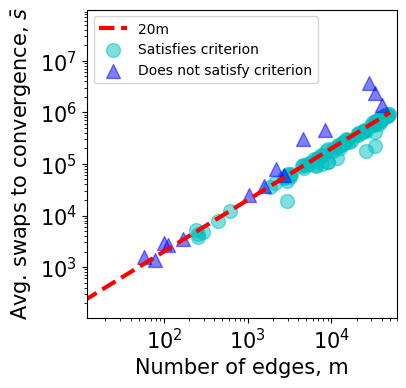

In [5]:
graphspace = "SimpleVertex"
edges, mean_swaps, network_names = get_swaps_bounds(graphspace)
plot_swaps(graphspace, edges, mean_swaps, network_names, slope = 20)

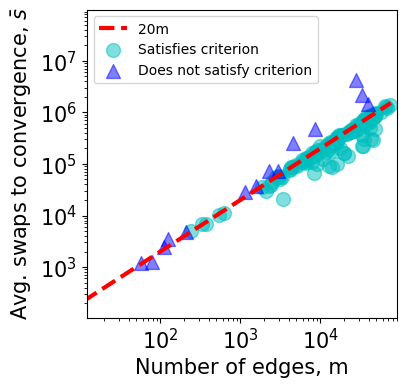

In [6]:
graphspace = "LoopyOnlyStub"
edges, mean_swaps, network_names = get_swaps_bounds(graphspace)
plot_swaps(graphspace, edges, mean_swaps, network_names, slope = 20)

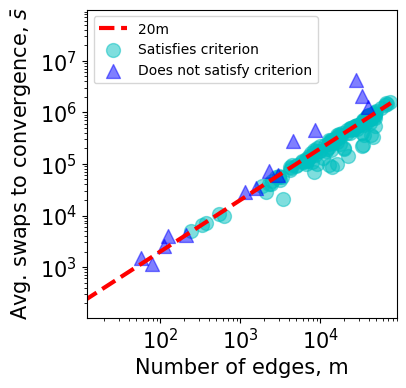

In [7]:
graphspace = "LoopyOnlyVertex"
edges, mean_swaps, network_names = get_swaps_bounds(graphspace)
plot_swaps(graphspace, edges, mean_swaps, network_names, slope = 20)

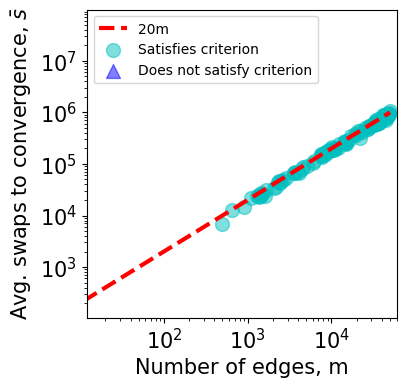

In [8]:
graphspace = "MultiLoopyStub"
edges, mean_swaps, network_names = get_swaps_bounds(graphspace)
plot_swaps(graphspace, edges, mean_swaps, network_names, slope = 20)

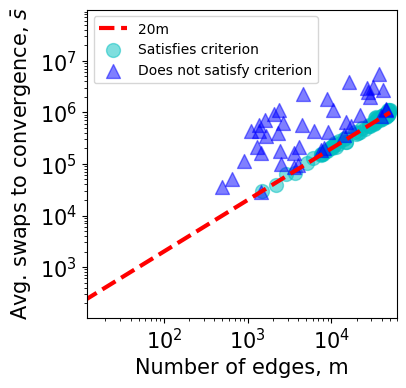

In [9]:
graphspace = "MultiLoopyVertex"
edges, mean_swaps, network_names = get_swaps_bounds(graphspace)
plot_swaps(graphspace, edges, mean_swaps, network_names, slope = 20)

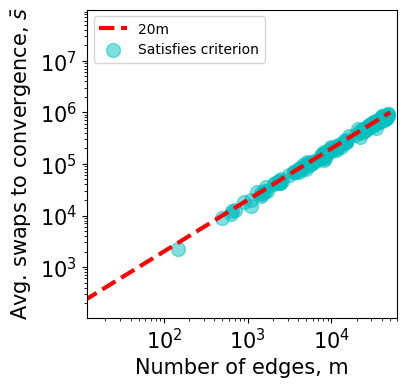

In [11]:
graphspace = "MultiOnlyStub"
edges, mean_swaps, network_names = get_swaps_bounds(graphspace)
plot_swaps(graphspace, edges, mean_swaps, network_names, slope = 20)

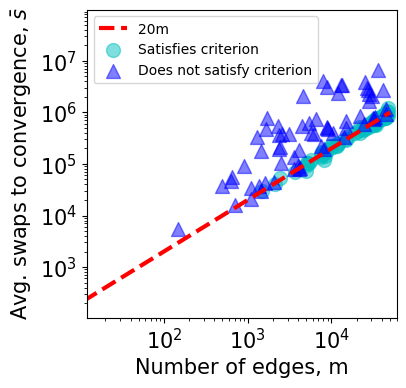

In [13]:
graphspace = "MultiOnlyVertex"
edges, mean_swaps, network_names = get_swaps_bounds(graphspace)
plot_swaps(graphspace, edges, mean_swaps, network_names, slope = 20)